# Market Basket Analysis

**Measures for Association rules:**

**1. Support**
- This measure gives an idea of how frequent an itemset is in all the transactions.
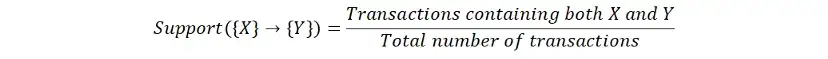


**2. Confidence**
- This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents. 


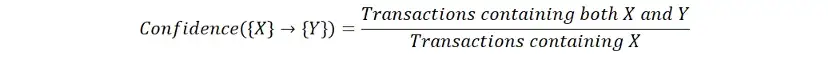

**3. Lift**
- Lift measures the correlation/dependence between item sets. For the rule A → B, we want to investigate whether the item sets A and B are correlated.

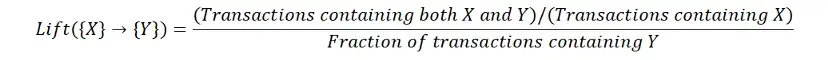

In [1]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\Datasets\Supermarket.csv",index_col=0)
df

,Products
ID,
1,"Milk, bread, sauce"
2,"Milk, Tea powder, bread"
3,"Bread, Jam, Butter"
4,"Bread, Butter"
5,"Maggie,Sauce"
6,"Maggie,Cheese,Sauce"
7,"Maggie,Cheese,Sauce"
8,"Peanut butter, Bread"
9,"Coffee, Sugar, Milk"


In [3]:
def split(text):
    return text.split(',')

In [4]:
a = 'jam,butter,maggie'
split(a)

['jam', 'butter', 'maggie']

In [5]:
data = list(df['Products'].apply(split))
data

[['Milk', ' bread', ' sauce'],
 ['Milk', ' Tea powder', ' bread'],
 ['Bread', ' Jam', ' Butter'],
 ['Bread', ' Butter'],
 ['Maggie', 'Sauce'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Peanut butter', ' Bread'],
 ['Coffee', ' Sugar', ' Milk'],
 ['Coffee', 'Milk'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Bread', ' Jam', ' Butter'],
 ['Butter', 'Cheese'],
 ['Maggie', 'Cheese', 'Sauce'],
 ['Maggie', 'Bread '],
 ['Bread', ' Torch', 'Jam'],
 ['Bread', ' Jam', ' Butter'],
 ['Jam', 'Butter', 'Torch'],
 ['Bread', ' Jam', ' Butter'],
 ['CornFlakes', ' Milk', ' Bread']]

In [6]:
te = TransactionEncoder()

en_df = te.fit_transform(data)

In [7]:
te.columns_

[' Bread',
 ' Butter',
 ' Jam',
 ' Milk',
 ' Sugar',
 ' Tea powder',
 ' Torch',
 ' bread',
 ' sauce',
 'Bread',
 'Bread ',
 'Butter',
 'Cheese',
 'Coffee',
 'CornFlakes',
 'Jam',
 'Maggie',
 'Milk',
 'Peanut butter',
 'Sauce',
 'Torch']

In [8]:
en_df = pd.DataFrame(en_df, columns=te.columns_)
en_df

,Bread,Butter,Jam,Milk,Sugar,Tea powder,Torch,bread,sauce,Bread,...,Butter,Cheese,Coffee,CornFlakes,Jam,Maggie,Milk,Peanut butter,Sauce,Torch
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [9]:
en_df.replace(False,0,inplace=True)
en_df.replace(True,1, inplace=True)

In [10]:
en_df

,Bread,Butter,Jam,Milk,Sugar,Tea powder,Torch,bread,sauce,Bread,...,Butter,Cheese,Coffee,CornFlakes,Jam,Maggie,Milk,Peanut butter,Sauce,Torch
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
score = apriori(en_df, min_support=0.2, use_colnames=True)
score

C:\Users\Aishwarya\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.25,( Butter)
1,0.20,( Jam)
2,0.30,(Bread)
3,0.25,(Cheese)
4,0.30,(Maggie)
5,0.25,(Sauce)
6,0.20,"( Butter, Jam)"
7,0.25,"( Butter, Bread)"
8,0.20,"(Bread, Jam)"
9,0.20,"(Maggie, Cheese)"


In [12]:
model = association_rules(score, metric='lift')
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Butter),( Jam),0.25,0.20,0.20,0.800000,4.000000,0.1500,4.00
1,( Jam),( Butter),0.20,0.25,0.20,1.000000,4.000000,0.1500,inf
2,( Butter),(Bread),0.25,0.30,0.25,1.000000,3.333333,0.1750,inf
3,(Bread),( Butter),0.30,0.25,0.25,0.833333,3.333333,0.1750,4.50
4,(Bread),( Jam),0.30,0.20,0.20,0.666667,3.333333,0.1400,2.40
5,( Jam),(Bread),0.20,0.30,0.20,1.000000,3.333333,0.1400,inf
6,(Maggie),(Cheese),0.30,0.25,0.20,0.666667,2.666667,0.1250,2.25
7,(Cheese),(Maggie),0.25,0.30,0.20,0.800000,2.666667,0.1250,3.50
8,(Cheese),(Sauce),0.25,0.25,0.20,0.800000,3.200000,0.1375,3.75
9,(Sauce),(Cheese),0.25,0.25,0.20,0.800000,3.200000,0.1375,3.75
